<a href="https://colab.research.google.com/github/qhz-23/lecture1/blob/main/3_Homework_UPDATED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [4]:
y = pd.read_csv("/content/gdrive/MyDrive/Econ441B/AAPL_quarterly_financials.csv")

In [5]:
y.index = y.name

In [6]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [7]:
y.index = pd.to_datetime(y.index)

In [8]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [10]:
!pip install pytrends

In [32]:
from pytrends.request import TrendReq

In [33]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPad", "Economy", "Huawei", "Macro", "Phone", "Mac", "Hamburger", "Bruin", "Grizzly bear"]
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [34]:
df = df.resample("Q").mean()

In [39]:
X = df

In [40]:
# ALIGN DATA
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [24]:
X_scaled = scaler.fit_transform(df)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [20]:
from sklearn.linear_model import Lasso

In [21]:
lasso = Lasso(alpha = 0.5)

In [45]:
lasso.fit(X, y)

Lasso(alpha=0.5)

In [46]:
coefficients = lasso.coef_
print(coefficients)

[ 0.00339102 -0.          0.         -0.00701401 -0.         -0.01934035
 -0.01372071 -0.         -0.        ]


In [47]:
import matplotlib.pyplot as plt

In [51]:
feature_names = df.columns

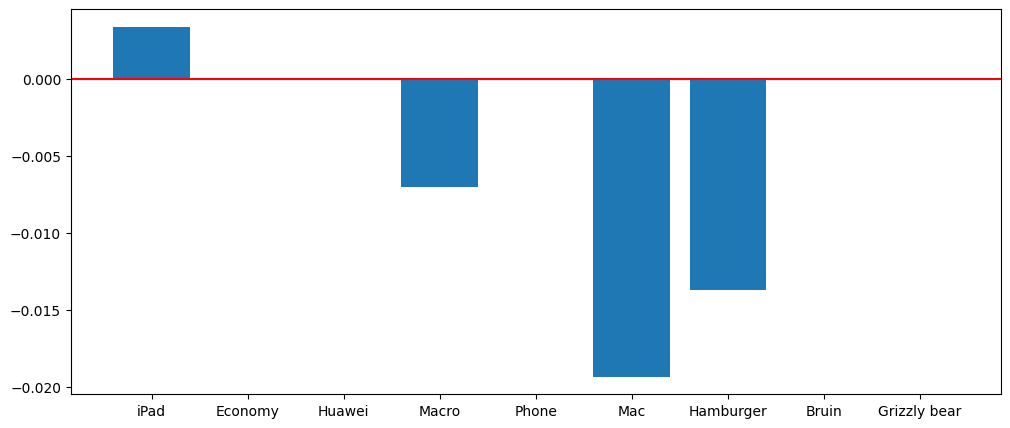

In [52]:
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)), coefficients,tick_label = feature_names)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

Most of the features have coefficients that are zero or very close to zero. This indicates that the Lasso regression model did not find these features to be informative for the prediction task at hand, under the regularization strength specified by the lambda value of 0.5. Therefore, these variables shoudl be removed.